In [1]:
!mkdir -p~/.kaggle
!cp kaggle.json ~/ .kaggle/

mkdir: invalid option -- '~'
Try 'mkdir --help' for more information.
cp: target '.kaggle/' is not a directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:20<00:00, 79.9MB/s]
100% 1.06G/1.06G [00:20<00:00, 56.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip' , 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#GENERATORS

In [32]:
train_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds =keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalise

In [33]:
def process(image,label):
  image = tf.cast(image/255 ,tf.float32)
  return image,label


train_ds= train_ds.map(process)
validation_ds=validation_ds.map(process)

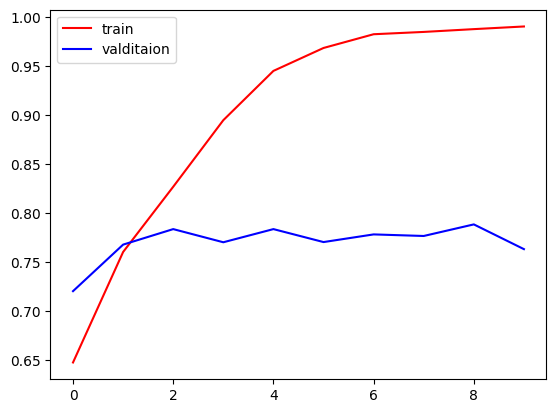

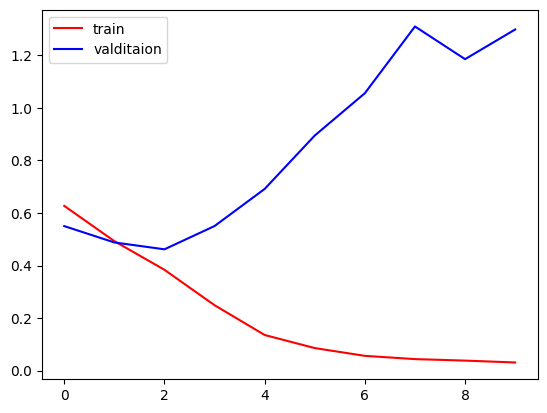

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='valditaion')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='valditaion')
plt.legend()
plt.show()


In [34]:
#cnn model

model= Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 53s 82ms/step - loss: 0.6271 - accuracy: 0.6479 - val_loss: 0.5501 - val_accuracy: 0.7206
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4929 - accuracy: 0.7605 - val_loss: 0.4879 - val_accuracy: 0.7680
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3837 - accuracy: 0.8270 - val_loss: 0.4618 - val_accuracy: 0.7838
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2488 - accuracy: 0.8947 - val_loss: 0.5504 - val_accuracy: 0.7704
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1355 - accuracy: 0.9449 - val_loss: 0.6917 - val_accuracy: 0.7838
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0856 - accuracy: 0.9683 - val_loss: 0.8951 - val_accuracy: 0.7706
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0561 - accuracy: 0.9823 - val_loss: 1.0562 - val_accuracy:

In [42]:
import cv2


In [55]:
test_img=cv2.imread('/content/catt.jpeg')

In [49]:
test_img.shape

(190, 265, 3)

In [59]:

test_img=cv2.resize (test_img,(256,256))

In [60]:
test_input=test_img.reshape((1,256,256,3))

In [61]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

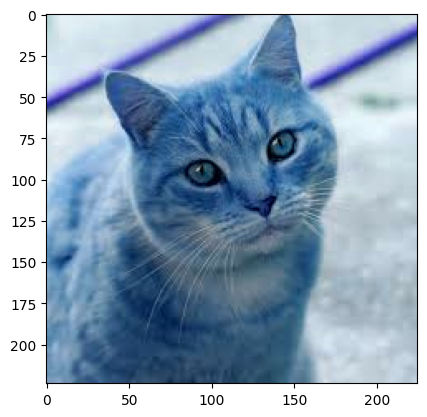

In [56]:
plt.imshow(test_img)